In [1]:
import sys, os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

path_data = '/home/lemasle/PROJECTS/UCI_electricity_consumption/data/UC_Irvine_ML_repository/'
path_src = Path('./src')
sys.path.append(os.path.abspath(path_src))
path_figs = Path('./figs')

In [3]:
cm = 1/2.54

In [4]:
import chunk_features
import ts_clustering

In [5]:
train = pd.read_hdf(Path(path_data) / 'UCI_15min_chunks_2010.h5')

In [6]:
train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,chunk_index
0,1.790,0.236,240.65,7.4,0.0,0.0,18.0,0
1,1.780,0.234,240.07,7.4,0.0,0.0,18.0,0
2,1.780,0.234,240.15,7.4,0.0,0.0,19.0,0
3,1.746,0.186,240.26,7.2,0.0,0.0,18.0,0
4,1.686,0.102,240.12,7.0,0.0,0.0,18.0,0
...,...,...,...,...,...,...,...,...
1425055,0.946,0.000,239.74,4.0,0.0,0.0,0.0,95003
1425056,0.942,0.000,239.41,4.0,0.0,0.0,0.0,95003
1425057,0.946,0.000,240.33,4.0,0.0,0.0,0.0,95003
1425058,0.946,0.000,240.43,4.0,0.0,0.0,0.0,95003


In [7]:
n_samples = 3000
list_n_clusters = [5, 10, 20, 30, 40, 50, 60, 70, 80]

In [8]:
list_scores = ts_clustering.search_cluster_number(train, 'Global_active_power', n_samples, list_n_clusters, 0)

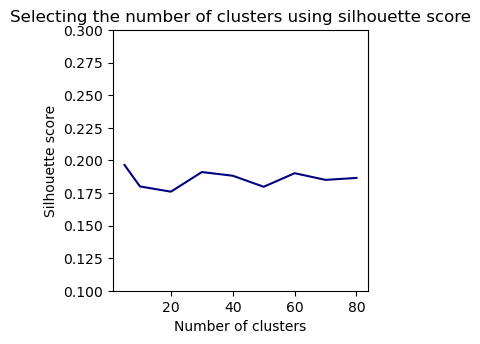

In [9]:
ts_clustering.plot_silhouette_scores(list_n_clusters, list_scores, path_figs, 'UCI_silhouette_score.pdf', cm)

In [10]:
n_clusters = 60

In [11]:
X_scaled = ts_clustering.prepare_input_data(train, 'Global_active_power', n_samples)

In [12]:
y, clusters = ts_clustering.timeseries_clustering(X_scaled, n_clusters, verbose=False, seed=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


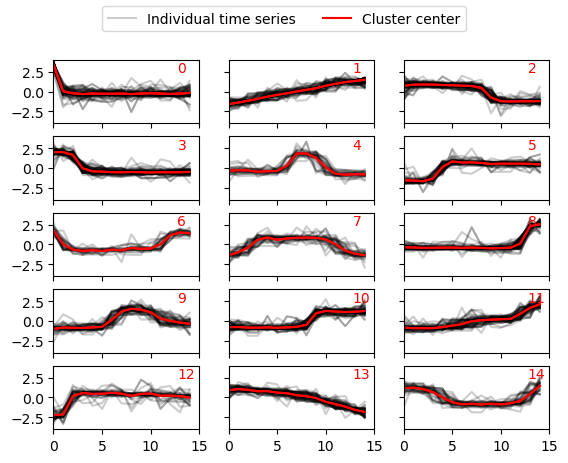

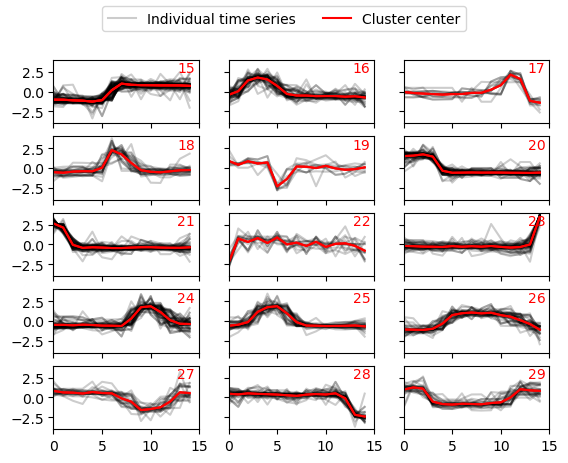

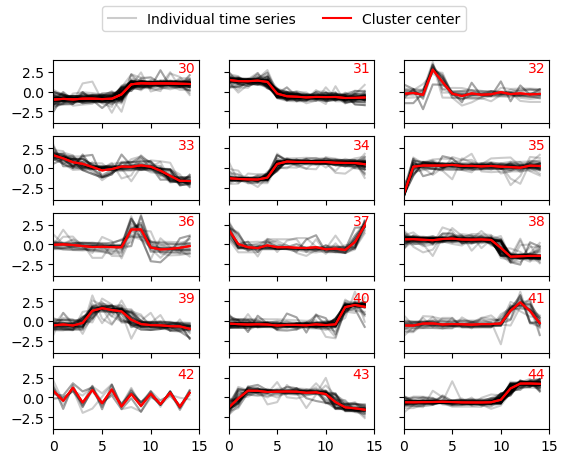

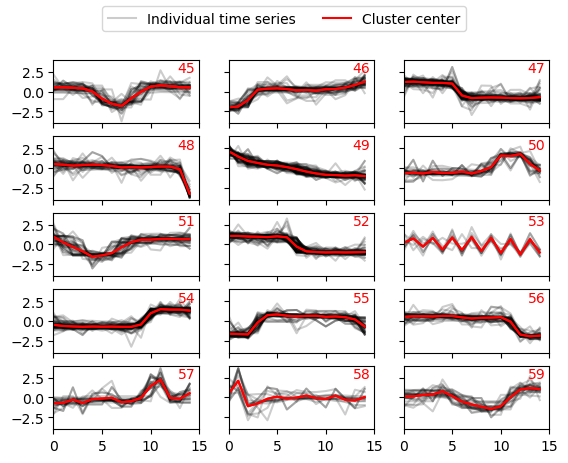

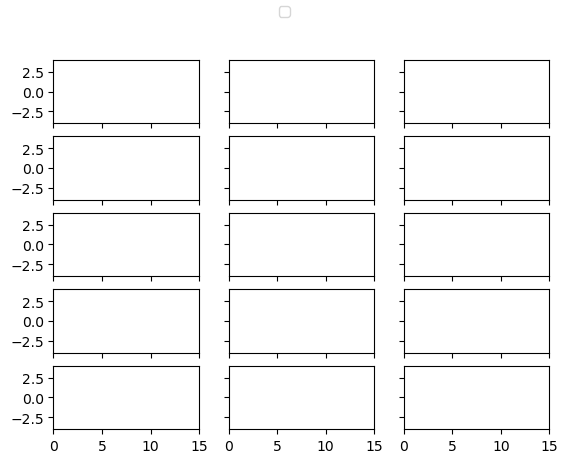

In [13]:
ts_clustering.multiplot_multipages(X_scaled, y, clusters, n_clusters, nrows=5, ncols=3, xlabel= '', ylabel='', path=path_figs, \
                     filename='multiplot.pdf',cm=cm)

In [14]:
sil_score = ts_clustering.compute_silhouette_score(X_scaled, clusters.labels_)

In [15]:
sil_samp = ts_clustering.compute_silhouette_samples(X_scaled, clusters.labels_)

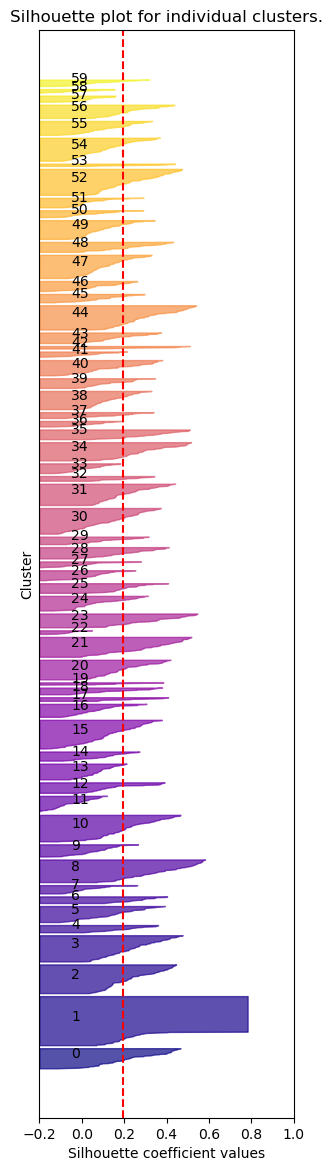

In [16]:
ts_clustering.plot_silhouette_score_for_samples(sil_score, sil_samp, -0.2, clusters.labels_, n_clusters, path_figs, 'UCI_silhouette_plot.pdf', cm)